In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
model = 'random_direction'
method = 'mean'

df_eval = pd.concat([
    pd.read_csv(f'evaluate/evaluate_{model}_{i}.csv')
    for i in range(3, 19)
])

In [25]:
df_eval.columns

Index(['velocity', 'towers', 'users', 'accuracy', 'accuracy_std', 'error',
       'error_std', 'recover_time', 'map_time', 'execution_time'],
      dtype='object')

In [26]:
len(df_eval)

2020

In [27]:
df_eval = getattr(df_eval.groupby(['velocity', 'towers', 'users']), method)().reset_index()
df_eval = df_eval[df_eval.users.isin({ 8, 16, 64, 256, 512 })]

In [28]:
df_eval[df_eval.users == 512].accuracy.min()

0.08087972005208334

In [7]:
df_eval[df_eval.users == 512].accuracy.min()

0.08087972005208334

In [8]:
df_eval.velocity.unique()

array(['(0.01, 0.01)', '(0.01, 0.02)', '(0.02, 0.04)', '(0.04, 0.04)',
       '(0.04, 0.08)', '(0.08, 0.1)', '(0.1, 0.1)'], dtype=object)

In [9]:
def plot_heatmap(vel_restriction, metric='accuracy', ax=None, vmin=None, vmax=None, cbar=True, title='', cmap=None):
    df = df_eval[df_eval.velocity == vel_restriction]
    
    n_tower_values = len(df.towers.unique())
    n_users_values = len(df.users.unique())

    sns.heatmap(
        df[metric].as_matrix().reshape((n_tower_values, n_users_values)),
        ax=ax,
        xticklabels=df['users'].unique(),
        yticklabels=df['towers'].unique(),
        vmax=vmax,
        vmin=vmin,
        cbar=cbar,
        cmap=cmap,
        square=True,
        fmt=".2f",
        annot=True,
    )
    
    ax.set(xlabel='# Users', ylabel='# Towers')
#     ax.set_title(title, pad=12)

# Accuracy and error analysis

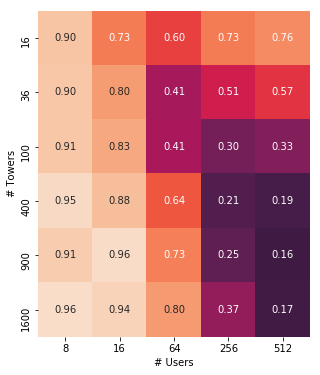

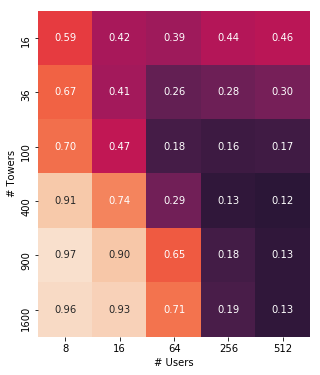

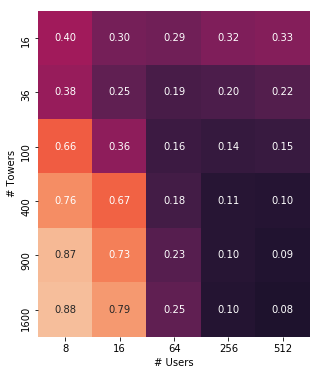

In [10]:
velocities = ['(0.01, 0.01)', '(0.04, 0.04)', '(0.1, 0.1)']
# velocities = ['(0.01, 0.02)', '(0.02, 0.04)', '(0.04, 0.08)', '(0.08, 0.1)']
n_velocity_values = len(velocities)

for i, vel in enumerate(velocities):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    plot_heatmap(
        vel_restriction=vel,
        title=f'Velocity {vel}',
        metric='accuracy',
        ax=axes,
        vmin=0,
        vmax=1,
        cbar=False)

    plt.savefig(f'./accuracy_{model}_{vel}.png', dpi=300)

In [11]:
# velocities = ['(0.01, 0.01)', '(0.04, 0.04)', '(0.1, 0.1)']
# velocities = ['(0.01, 0.02)', '(0.02, 0.04)', '(0.04, 0.08)', '(0.08, 0.1)']
# n_velocity_values = len(velocities)

# for i, vel in enumerate(velocities):
#     fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
#     plot_heatmap(
#         vel_restriction=vel,
#         title=f'Velocity {vel}',
#         metric='accuracy',
#         ax=axes,
#         vmin=0,
#         vmax=1,
#         cbar=False)

#     plt.savefig(f'./accuracy_{model}_{vel}.png', dpi=300)

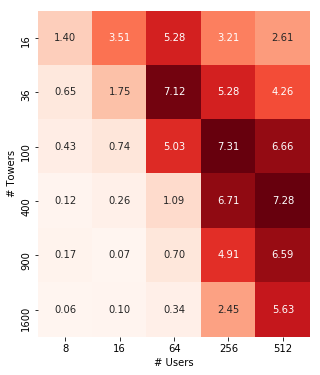

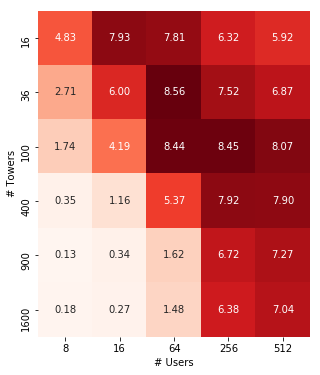

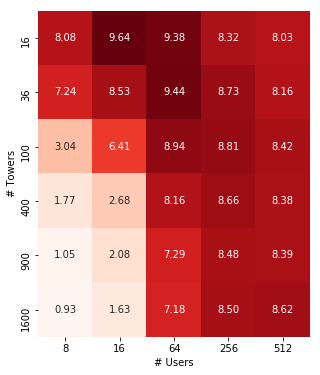

In [12]:
velocities = ['(0.01, 0.01)', '(0.04, 0.04)', '(0.1, 0.1)']
# velocities = ['(0.01, 0.02)', '(0.02, 0.04)', '(0.04, 0.08)', '(0.08, 0.1)']
n_velocity_values = len(velocities)

for i, vel in enumerate(velocities):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    plot_heatmap(vel_restriction=vel, metric='error', ax=axes, title=f'Velocity {vel}', cbar=False, cmap='Reds')

    plt.savefig(f'./error_{model}_{vel}.png', dpi=300)

In [13]:
# velocities = ['(0.01, 0.01)', '(0.04, 0.04)', '(0.1, 0.1)']
# velocities = ['(0.01, 0.02)', '(0.02, 0.04)', '(0.04, 0.08)', '(0.08, 0.1)']
# n_velocity_values = len(velocities)

# for i, vel in enumerate(velocities):
#     fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
#     plot_heatmap(vel_restriction=vel, metric='error', ax=axes, title=f'Velocity {vel}', cbar=False)

#     plt.savefig(f'./error_{model}_{vel}.png', dpi=300)

# Particular case for 16 and 32 towers

In [30]:
df_eval = pd.read_csv(f'evaluate/evaluate_random_direction_3.csv')
df_eval = getattr(df_eval.groupby(['velocity', 'towers', 'users']), method)().reset_index()
df_eval = df_eval[(df_eval.velocity == '(0.01, 0.01)') & (df_eval.towers.isin({ 16, 36 }))]

In [31]:
df_eval

,velocity,towers,users,accuracy,accuracy_std,error,error_std,recover_time,map_time,execution_time
0,"(0.01, 0.01)",16,8,0.958333,0.000000,0.333333,0.577350,0.010117,0.142995,0.158900
1,"(0.01, 0.01)",16,16,0.618229,0.008333,4.946422,3.392349,0.032810,0.146549,0.192397
2,"(0.01, 0.01)",16,32,0.638802,0.019271,5.012358,5.330220,0.118270,0.268632,0.417372
3,"(0.01, 0.01)",16,64,0.611328,0.005208,5.541986,5.005589,0.217241,0.554000,0.798188
4,"(0.01, 0.01)",16,256,0.721875,0.001367,3.171450,3.744783,4.612936,7.607316,12.306020
5,"(0.01, 0.01)",16,512,0.754704,0.001497,2.651100,3.055305,32.394598,30.122086,62.684781
6,"(0.01, 0.01)",16,1024,0.787646,0.000879,2.108245,2.441370,234.355043,96.419881,331.092002
7,"(0.01, 0.01)",16,2048,0.787126,0.000130,2.012171,2.394458,2783.189623,375.916428,3159.782582
8,"(0.01, 0.01)",16,4096,0.000000,0.000000,0.000000,0.000000,32249.235479,0.000000,32249.235479
9,"(0.01, 0.01)",36,8,1.000000,0.000000,0.000000,0.000000,0.009242,0.149179,0.166654


In [32]:
df_eval.accuracy

0     0.958333
1     0.618229
2     0.638802
3     0.611328
4     0.721875
5     0.754704
6     0.787646
7     0.787126
8     0.000000
9     1.000000
10    0.799479
11    0.579167
12    0.424609
13    0.530339
14    0.568066
15    0.620581
16    0.646423
Name: accuracy, dtype: float64

ValueError: cannot reshape array of size 17 into shape (2,9)

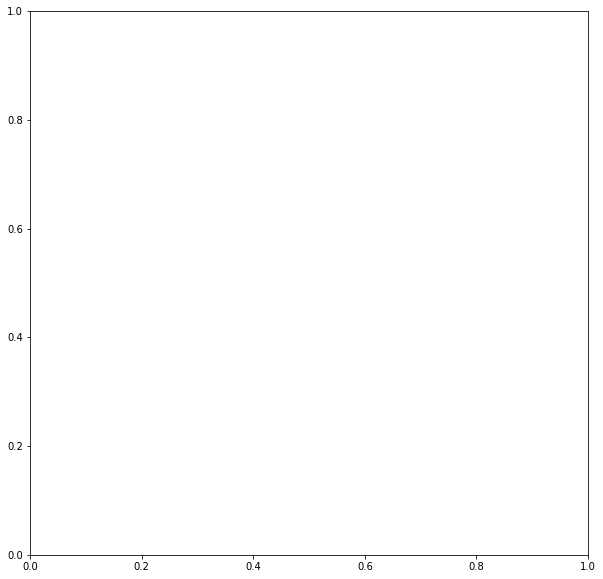

In [33]:
n_tower_values = len(df_eval.towers.unique())
n_users_values = len(df_eval.users.unique())

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(
    df_eval['accuracy'].as_matrix().reshape((n_tower_values, n_users_values)),
    xticklabels=df_eval['users'].unique(),
    yticklabels=df_eval['towers'].unique(),
    square=True,
    vmin=0,
    vmax=1,
    ax=ax,
    fmt=".4f",
    annot=True,
)

ax.set(xlabel='# Users', ylabel='# Towers')
plt.savefig(f'./accuracy_multiple_users.png', dpi=300)

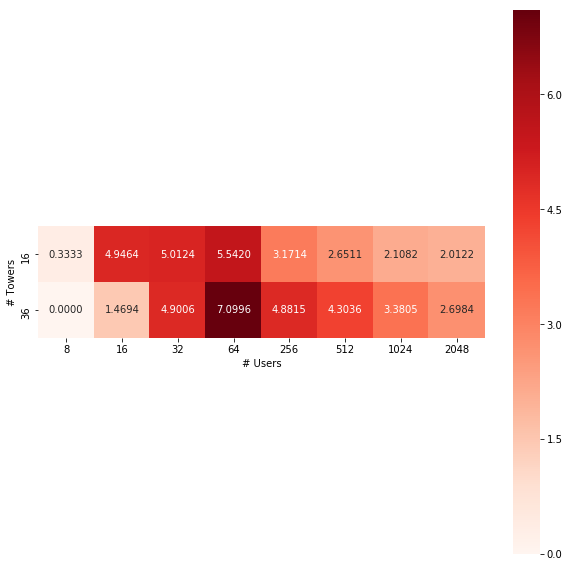

In [20]:
n_tower_values = len(df_eval.towers.unique())
n_users_values = len(df_eval.users.unique())

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(
    df_eval['error'].as_matrix().reshape((n_tower_values, n_users_values)),
    xticklabels=df_eval['users'].unique(),
    yticklabels=df_eval['towers'].unique(),
    square=True,
    ax=ax,
    fmt=".4f",
    annot=True,
    cmap='Reds',
)

ax.set(xlabel='# Users', ylabel='# Towers')
plt.savefig(f'./error_multiple_users.png', dpi=300)

# Execution time analysis

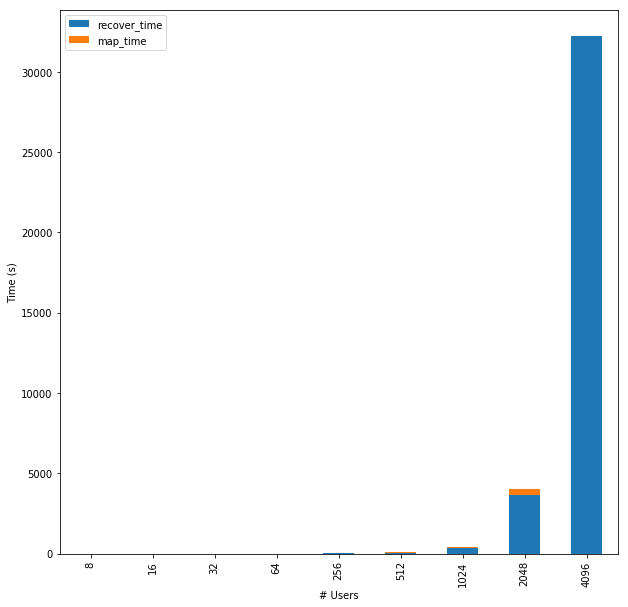

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))

df_eval.groupby(['users']).mean()[[
        'recover_time',
        'map_time',
#         'execution_time',
]].plot.bar(ax=ax, stacked=True)

ax.set(xlabel="# Users", ylabel="Time (s)")
plt.savefig(f'./execution_time.png', dpi=300)

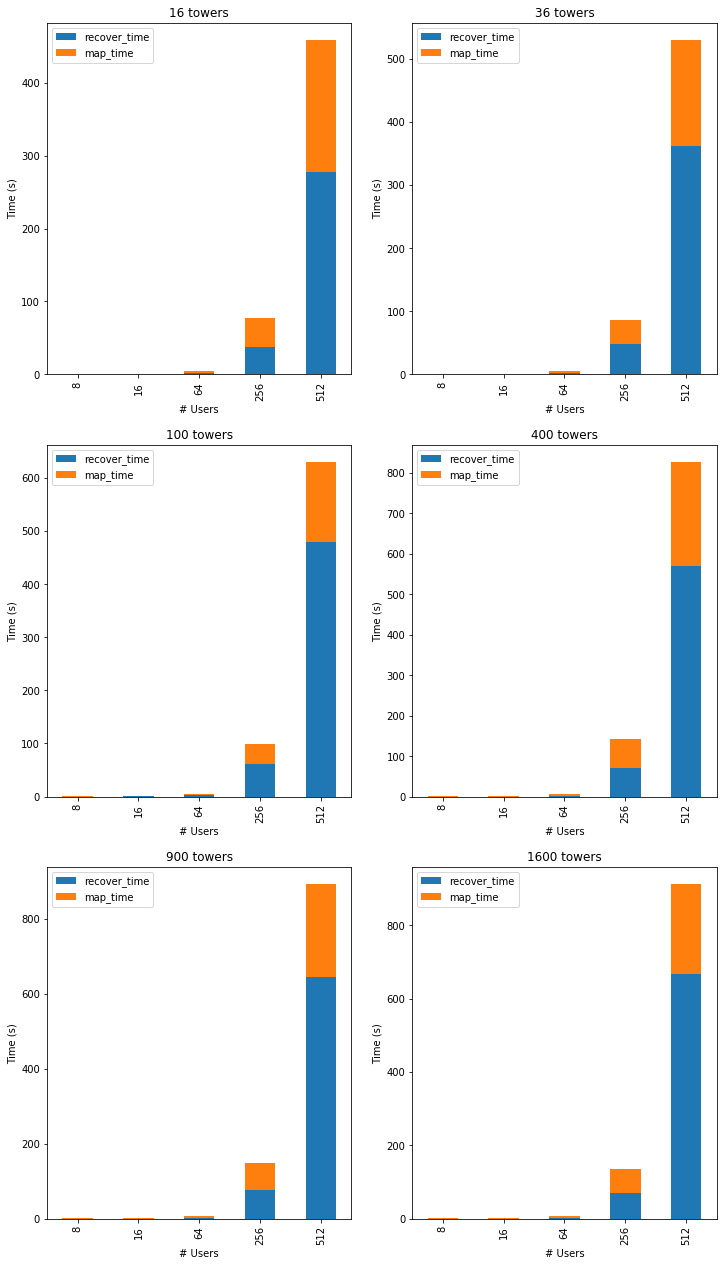

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 22))
axes = axes.flatten()

for ax, t in zip(axes, df_eval.towers.unique()):
    df_eval[df_eval.towers == t].groupby(['users']).mean()[[
        'recover_time',
        'map_time',
#         'execution_time',
    ]].plot.bar(ax=ax, stacked=True)
    ax.set_title(f'{t} towers')
    ax.set(xlabel='# Users', ylabel='Time (s)')

plt.savefig(f'./execution_time_by_towers.png', dpi=300)